<a href="https://colab.research.google.com/github/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/blob/main/results_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=197bb31ce237a604f42d6593084f39ce57e07ce9eaa48b3b00c7eca197a4e626
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

excel = pd.read_excel("ris.xlsx")
excel.columns = ['SEED', 'SEQ_LEN', 'DATASET', 'METHOD', 'THRESHOLD', 'True-f1',
       'weighted-f1', 'accuracy', 'true_recall', 'true_precision',
       'weighted_recall', 'weighted_precision', 'epoch_time']
excel.sort_values(by=['DATASET', 'METHOD', 'SEQ_LEN','THRESHOLD'])

lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

## SEQ_LEN_METHOD


Print F1 per each METHOD for each SEQ_LEN of all DATASET at varying of THRESHOLD

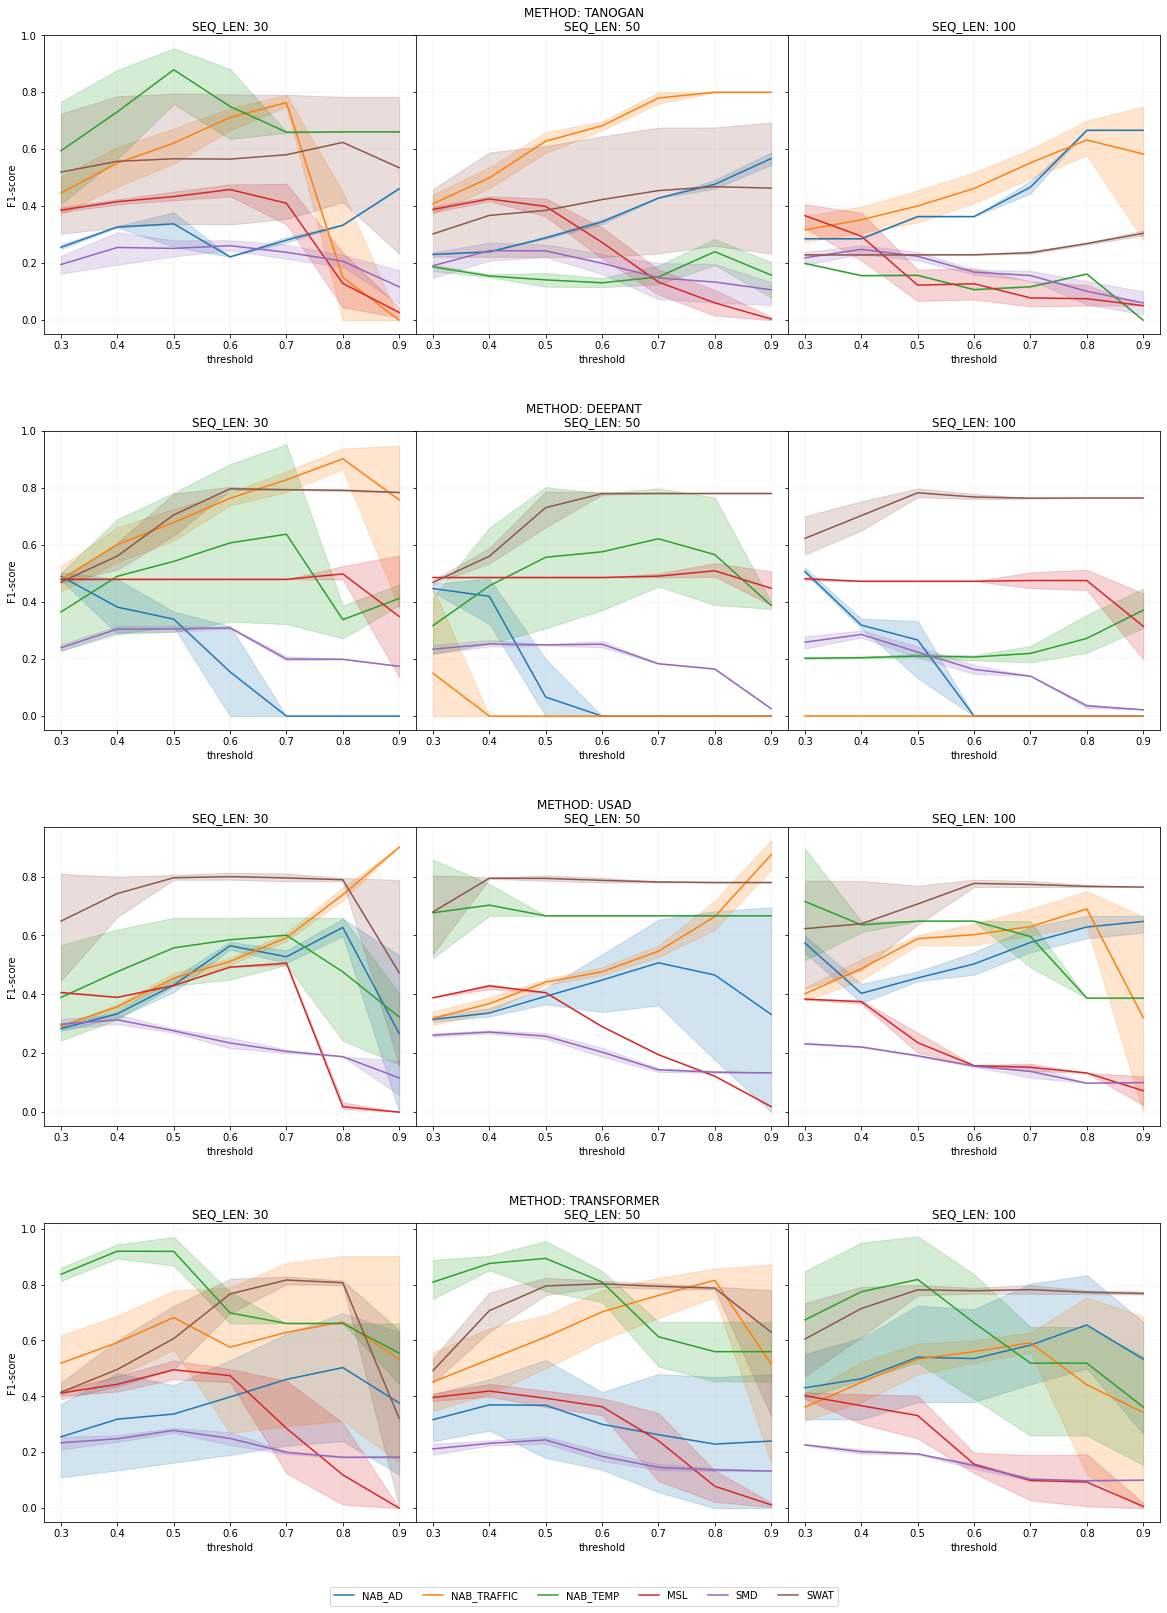

In [29]:
hue_order = excel['DATASET'].unique()
fig = plt.figure(figsize=(20,22))
subfigs = fig.subfigures(nrows=4, ncols=1, hspace=3)
# fig, axs = plt.subplots(6, 3, figsize=(20,36), sharey='row', subplot_kw=dict(frameon=True))
# plt.subplots_adjust(wspace=.0, hspace=0.5)
for row, m in zip(subfigs, excel.METHOD.unique()):
  row.suptitle('METHOD: {}'.format(m), y=.95) 
  axs = row.subplots(nrows=1, ncols=3, sharey="row")
  row.subplots_adjust(wspace=.0)
  for ax,l in zip(axs,excel.SEQ_LEN.unique()): 
    data = excel[(excel['METHOD'] == m) & (excel['SEQ_LEN']==l)]
    sns.lineplot(data=data, x='THRESHOLD', y='True-f1', hue='DATASET', ax=ax, hue_order=hue_order)
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.1)
    ax.set_title("SEQ_LEN: {}".format(l), pad=5)
    ax.set(xlabel="threshold",ylabel="F1-score")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.legend(handles, labels, loc="lower center", ncol=6, bbox_to_anchor=(0.5,-0.025))
plt.show()
print("\n\n")

## SEQ_LEN_DS


Print F1 per each DATASET for each SEQ_LEN of all METHOD at varying of THRESHOLD

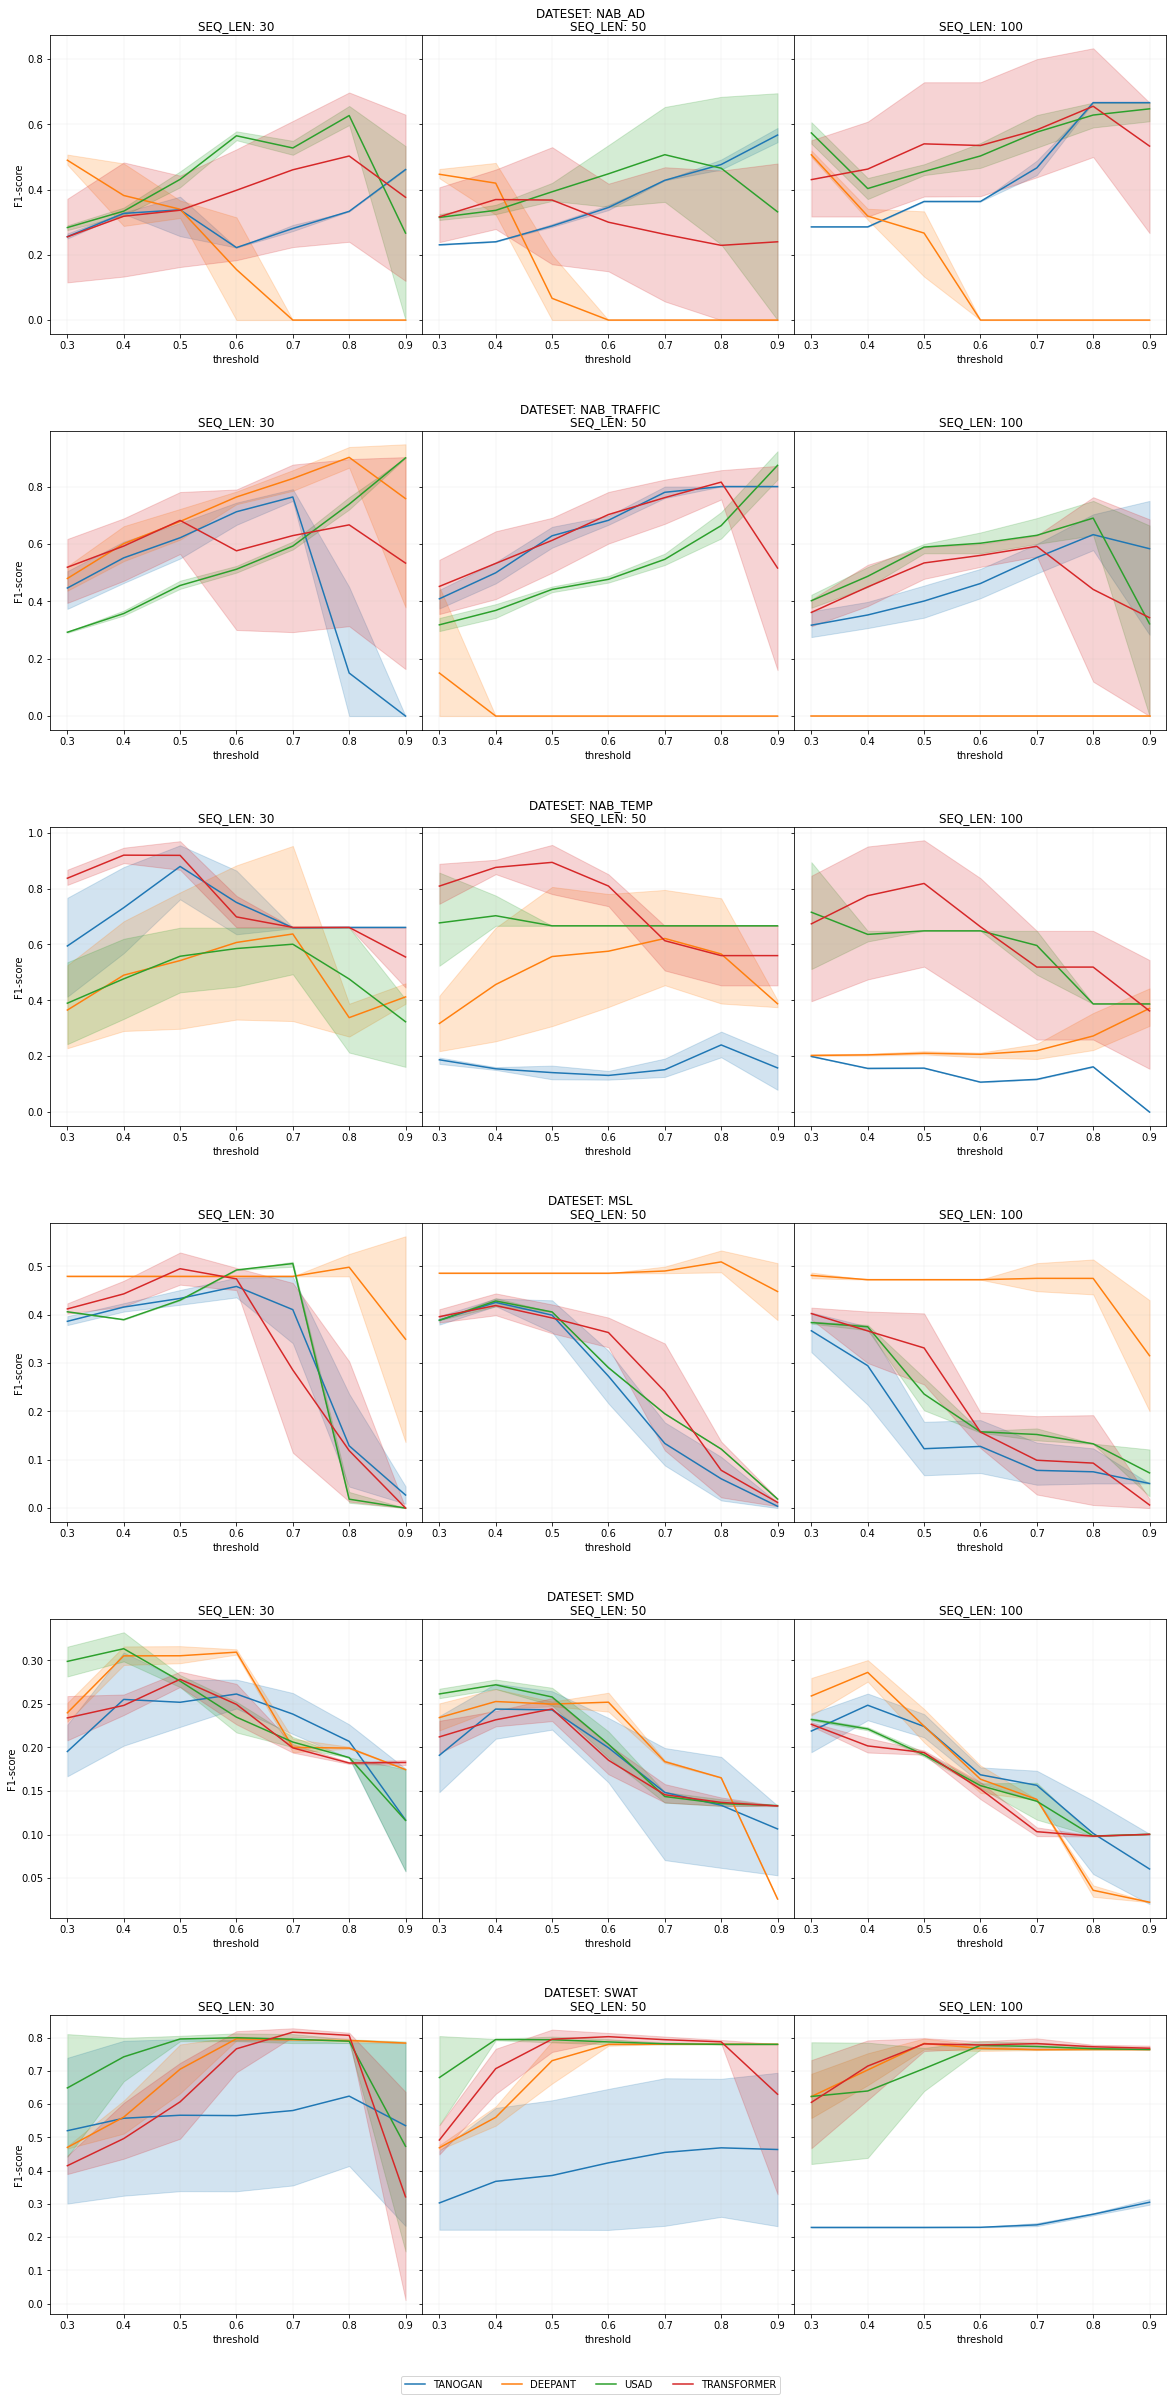

In [30]:
hue_order = excel['METHOD'].unique()
fig = plt.figure(figsize=(20,33))
subfigs = fig.subfigures(nrows=6, ncols=1, hspace=3)
# fig, axs = plt.subplots(6, 3, figsize=(20,36), sharey='row', subplot_kw=dict(frameon=True))
# plt.subplots_adjust(wspace=.0, hspace=0.5)
for row, d in zip(subfigs, excel.DATASET.unique()):
  row.suptitle('DATESET: {}'.format(d), y=.95) 
  axs = row.subplots(nrows=1, ncols=3, sharey="row")
  row.subplots_adjust(wspace=.0)
  for ax,l in zip(axs,excel.SEQ_LEN.unique()): 
    data = excel[(excel['DATASET'] == d) & (excel['SEQ_LEN']==l)]
    sns.lineplot(data=data, x='THRESHOLD', y='True-f1', hue='METHOD', ax=ax, hue_order=hue_order)
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.1)
    ax.set_title("SEQ_LEN: {}".format(l), pad=5)
    ax.set(xlabel="threshold",ylabel="F1-score")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5,-0.015))
plt.show()
print("\n\n")

## MAX_F1_DS


In [ ]:
means_seed = excel.groupby(['DATASET','METHOD','SEQ_LEN','THRESHOLD']).mean().reset_index()
means = means_seed[['DATASET', 'METHOD', 'SEQ_LEN', 'True-f1']]

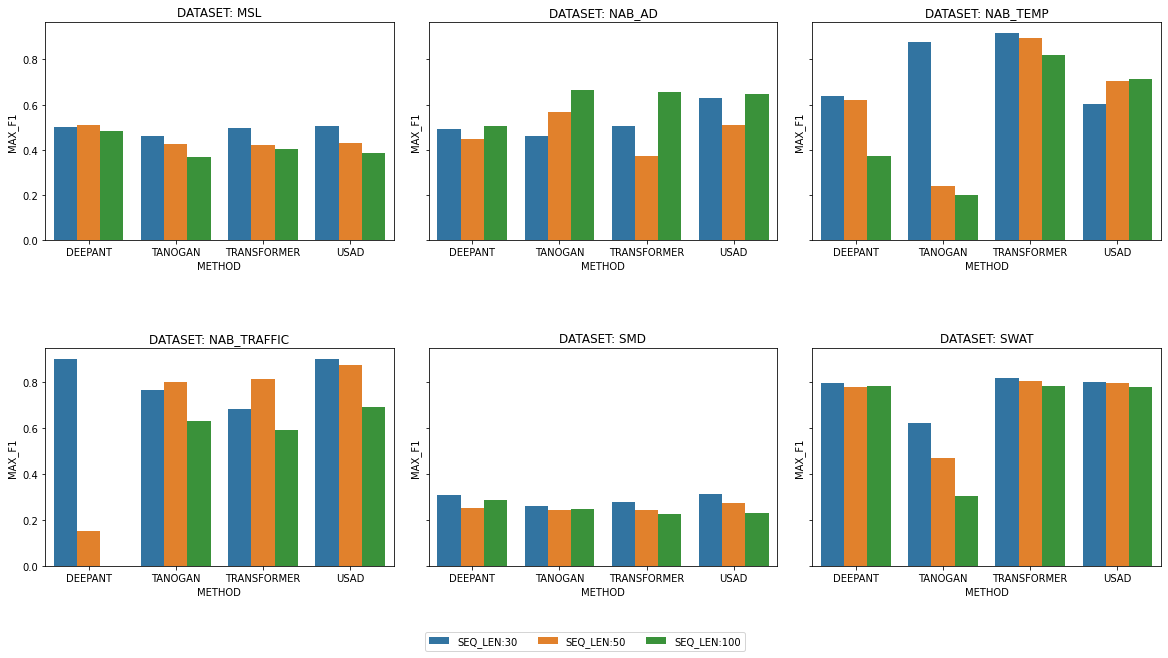

In [31]:
query = """
SELECT DATASET, METHOD, SEQ_LEN, MAX("True-f1") as MAX_F1
FROM means
GROUP BY DATASET, METHOD, SEQ_LEN
"""

max_seq_len = ps.sqldf(query)

hue_order=excel['SEQ_LEN'].unique()

fig, axs = plt.subplots(2,3, figsize=(20,10), sharey='row', subplot_kw=dict(frameon=True))
plt.subplots_adjust(hspace=0.5, wspace=0.1)
for ax,d in zip(axs.flatten(),max_seq_len.DATASET.unique()):
  #fig, axs = plt.subplots(1, 1, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  data = max_seq_len[max_seq_len['DATASET'] == d]
  sns.barplot(data = data, hue='SEQ_LEN', y='MAX_F1', x='METHOD', ax=ax, hue_order=hue_order)
  handles, labels = ax.get_legend_handles_labels()
  ax.get_legend().remove()
  ax.set_title("DATASET: {}".format(d))
labels = ["SEQ_LEN:{}".format(l) for l in labels]
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5,0))
plt.show()

## MAX_F1_METHOD


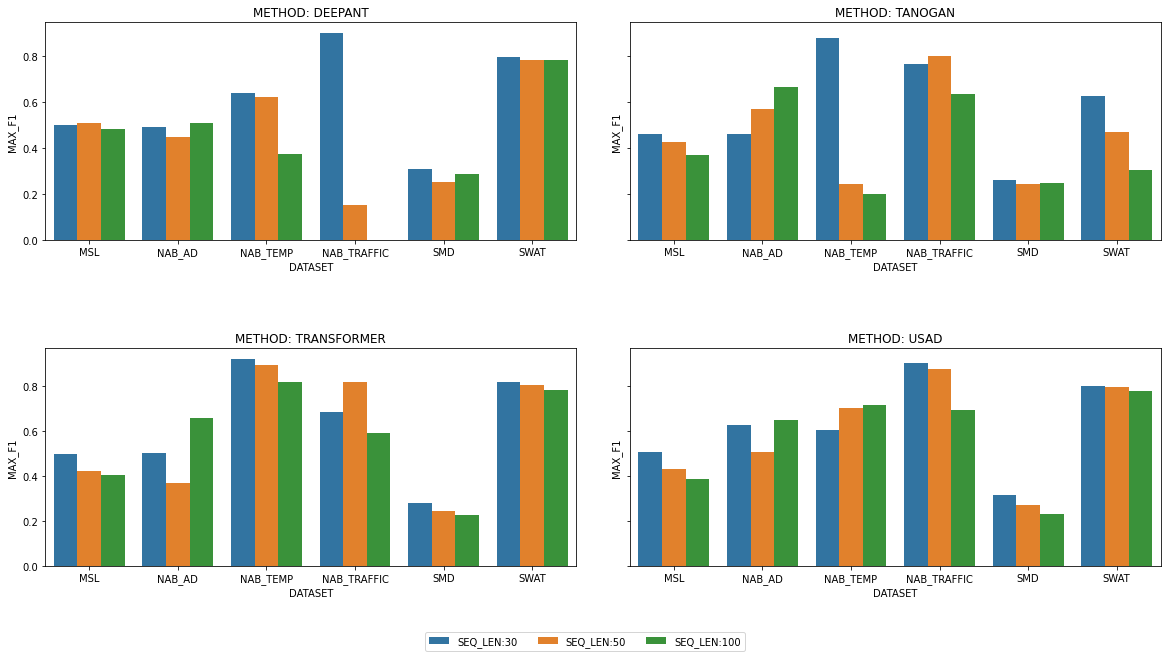

In [32]:
query = """
SELECT DATASET, METHOD, SEQ_LEN, MAX("True-f1") as MAX_F1
FROM means
GROUP BY DATASET, METHOD, SEQ_LEN
"""

max_seq_len = ps.sqldf(query)
hue_order=excel['SEQ_LEN'].unique()
fig, axs = plt.subplots(2,2, figsize=(20,10), sharey='row', subplot_kw=dict(frameon=True))
plt.subplots_adjust(hspace=0.5, wspace=0.1)
for ax,d in zip(axs.flatten(),max_seq_len.METHOD.unique()):
  #fig, axs = plt.subplots(1, 1, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  data = max_seq_len[max_seq_len['METHOD'] == d]
  sns.barplot(data = data, hue='SEQ_LEN', y='MAX_F1', x='DATASET', ax=ax, hue_order=hue_order)
  handles, labels = ax.get_legend_handles_labels()
  ax.get_legend().remove()
  ax.set_title("METHOD: {}".format(d))
labels = ["SEQ_LEN:{}".format(l) for l in labels]
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5,0))
plt.show()

## TABLE: MAX_F1_DS

print per each dataset the number of times a SEQ_LEN obtain the max result 


In [ ]:
q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1
       FROM means_seed
       GROUP BY "DATASET", "METHOD" 
        """

step1 = ps.sqldf(q)

q = """
    SELECT DATASET, METHOD, SEQ_LEN, COUNT(SEQ_LEN) AS CNT
    FROM step1 
    GROUP BY "DATASET", "SEQ_LEN"

     """
temp = ps.sqldf(q)
q = """
SELECT DATASET, SEQ_LEN, CNT
FROM temp 
"""
ps.sqldf(q)

DATASET  SEQ_LEN  CNT
0          MSL       30    3
1          MSL       50    1
2       NAB_AD      100    4
3     NAB_TEMP       30    3
4     NAB_TEMP      100    1
5  NAB_TRAFFIC       30    2
6  NAB_TRAFFIC       50    2
7          SMD       30    4
8         SWAT       30    4

## Anomaly Score plot

In [17]:
import numpy as np 

result_df = pd.DataFrame(columns=['METHOD', 'ANOMALY_SCORE', 'GROUND'])
for m in excel.METHOD.unique():
  ground = np.load("SWAT_{}_ground.npy".format(m))
  scores = np.load("SWAT_{}_anomaly_score.npy".format(m))
  data = pd.DataFrame(zip([m for _ in scores], scores, ground), columns=['METHOD', 'ANOMALY_SCORE', 'GROUND'])
  result_df = pd.concat((result_df, data))


scores_df = result_df.reset_index()
scores_df.columns = ['INDEX','METHOD', 'ANOMALY_SCORE', 'GROUND']

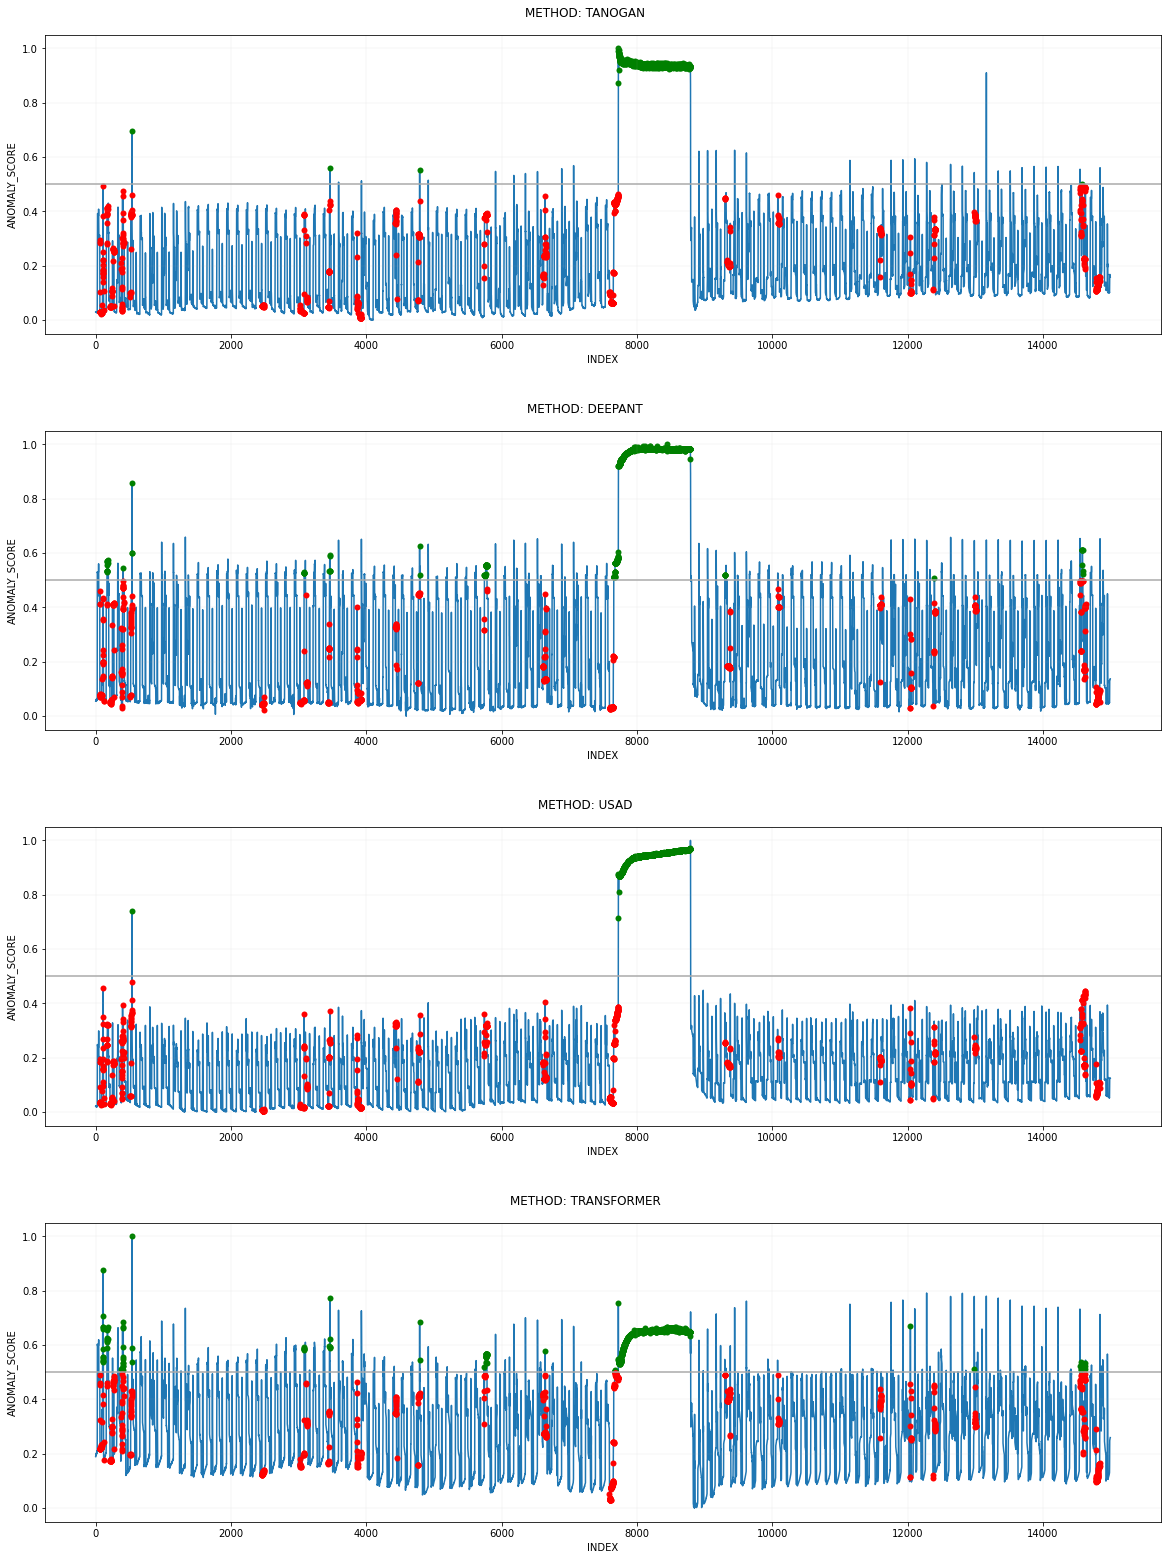

In [23]:
from re import A
th = 0.5
fig = plt.figure(figsize=(20,22))
subfigs = fig.subfigures(nrows=4, ncols=1, hspace=3)
# fig, axs = plt.subplots(6, 3, figsize=(20,36), sharey='row', subplot_kw=dict(frameon=True))
# plt.subplots_adjust(wspace=.0, hspace=0.5)
for row, m in zip(subfigs, excel.METHOD.unique()):
  row.suptitle('METHOD: {}'.format(m), y=.95) 
  ax = row.subplots(nrows=1, ncols=1)
  
  data = scores_df[(scores_df['METHOD'] == m)]
  sns.scatterplot(x=data[(data['GROUND']==True) & (data['ANOMALY_SCORE']>= th)]['INDEX'], y=data[(data['GROUND']==True) & (data['ANOMALY_SCORE']>= th)]['ANOMALY_SCORE'], color='green', linewidth=0,zorder=1)
  sns.scatterplot(x=data[(data['GROUND']==True) & (data['ANOMALY_SCORE'] < th)]['INDEX'], y=data[(data['GROUND']==True) & (data['ANOMALY_SCORE']< th)]['ANOMALY_SCORE'], color='red', linewidth=0,zorder=1)
  sns.lineplot(data=data, y='ANOMALY_SCORE', x='INDEX', zorder=0)
  ax.axhline(th, color="darkgray")
  ax.grid(color='#b0adac', linestyle='-', linewidth=0.1)
  # ax.set(xlabel="threshold",ylabel="F1-score")
  # handles, labels = ax.get_legend_handles_labels()
  # ax.get_legend().remove()
# fig.legend(handles, labels, loc="lower center", ncol=6, bbox_to_anchor=(0.5,-0.025))
plt.show()
print("\n\n")

In [33]:
for m in scores_df.METHOD.unique():
  data = scores_df[(scores_df['METHOD'] == m)]
  false_mean = data[data['GROUND']==False]['ANOMALY_SCORE'].mean()
  true_mean = data[data['GROUND']==True]['ANOMALY_SCORE'].mean()
  print("METHOD: {} ===>".format(m),true_mean, false_mean, ": ", true_mean-false_mean)

METHOD: TANOGAN ===> 0.6365516883797178 0.1628121074393231 :  0.4737395809403947
METHOD: DEEPANT ===> 0.6722878072651468 0.18395111738804418 :  0.48833668987710266
METHOD: USAD ===> 0.6151931336197746 0.11782731343173843 :  0.49736582018803616
METHOD: TRANSFORMER ===> 0.507286825634796 0.24969542947736073 :  0.25759139615743526


## THREE SCORE DS


In [14]:
three_score_df = pd.DataFrame(columns=['DATASET', 'METHOD', 'F1_SCORE', 'RECALL', 'PRECISION', 'THRESHOLD', 'SEED'])

q = """SELECT "DATASET","METHOD", "SEQ_LEN" , "True-f1" AS F1_SCORE, true_recall AS RECALL, true_precision AS PRECISION, THRESHOLD, SEED
         FROM excel
         WHERE "SEQ_LEN" = 30 AND "DATASET" in ('SWAT', 'SMD', 'MSL')
    """

max = ps.sqldf(q)
three_score_df = pd.concat([three_score_df, max]).reset_index().drop(columns='index')

q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,"True-f1" AS F1_SCORE, true_recall AS RECALL, true_precision AS PRECISION, THRESHOLD, SEED
      FROM excel
      WHERE "SEQ_LEN" = 100 AND "DATASET" in ('NAB_AD')
      """

max = ps.sqldf(q)
three_score_df= pd.concat([three_score_df, max]).reset_index().drop(columns="index")

three_score_df

DATASET       METHOD  F1_SCORE   RECALL  PRECISION  THRESHOLD SEED  \
0       MSL      DEEPANT  0.479355  0.80678   0.340974        0.3    1   
1       MSL      DEEPANT  0.479355  0.80678   0.340974        0.4    1   
2       MSL      DEEPANT  0.479355  0.80678   0.340974        0.5    1   
3       MSL      DEEPANT  0.479355  0.80678   0.340974        0.6    1   
4       MSL      DEEPANT  0.479355  0.80678   0.340974        0.7    1   
..      ...          ...       ...      ...        ...        ...  ...   
555  NAB_AD  TRANSFORMER  0.615385  1.00000   0.444444        0.5    4   
556  NAB_AD  TRANSFORMER  0.363636  0.50000   0.285714        0.6    4   
557  NAB_AD  TRANSFORMER  0.444444  0.50000   0.400000        0.7    4   
558  NAB_AD  TRANSFORMER  0.444444  0.50000   0.400000        0.8    4   
559  NAB_AD  TRANSFORMER  0.666667  0.50000   1.000000        0.9    4   

     SEQ_LEN  
0       30.0  
1       30.0  
2       30.0  
3       30.0  
4       30.0  
..       ...  
555    100.0  
556    100.0  
557    100.0  
558    100.0  
559    100.0  

[560 rows x 8 columns]

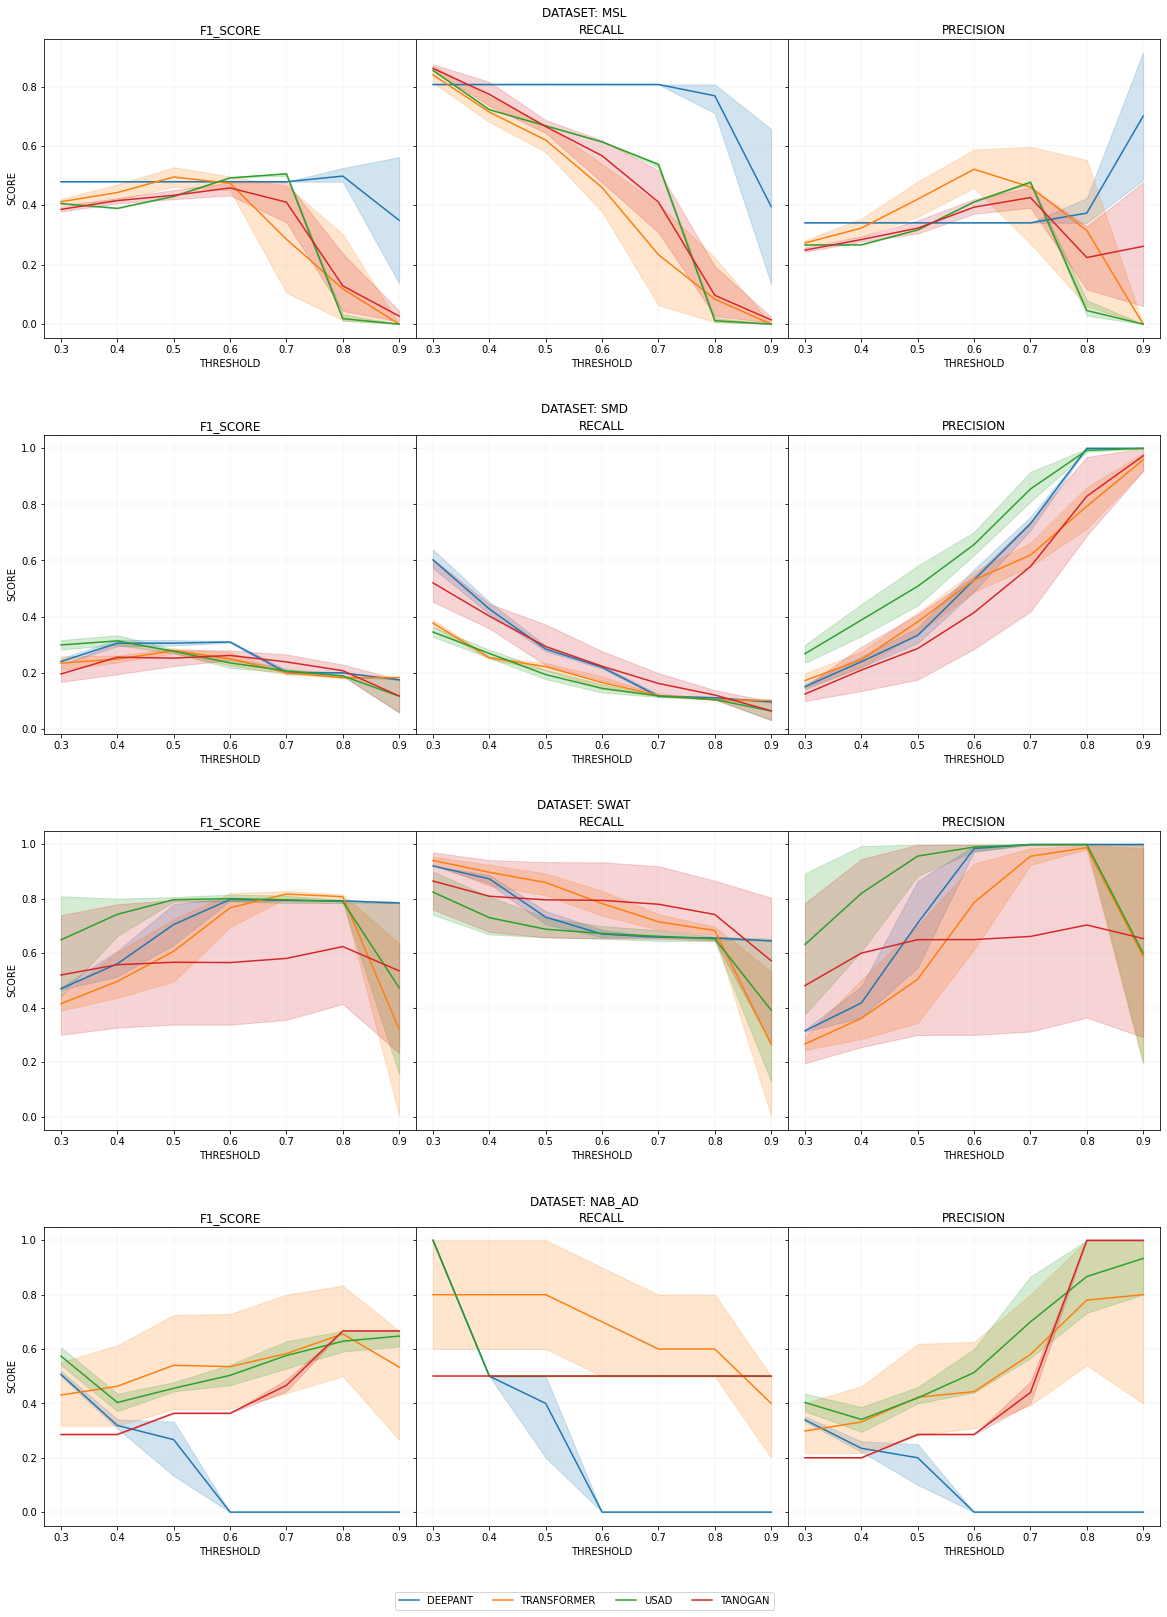

In [28]:
hue_order = three_score_df['METHOD'].unique()
fig = plt.figure(figsize=(20,22))
subfigs = fig.subfigures(nrows=4, ncols=1, hspace=3)
# fig, axs = plt.subplots(6, 3, figsize=(20,36), sharey='row', subplot_kw=dict(frameon=True))
# plt.subplots_adjust(wspace=.0, hspace=0.5)
for row, d in zip(subfigs, three_score_df.DATASET.unique()):
  row.suptitle('DATASET: {}'.format(d), y=.96) 
  axs = row.subplots(nrows=1, ncols=3, sharey="row")
  row.subplots_adjust(wspace=.0)
  for ax,s in zip(axs,['F1_SCORE', 'RECALL', 'PRECISION']): 
    data = three_score_df[(three_score_df['DATASET'] == d)]
    sns.lineplot(data=data, x='THRESHOLD', y=s, hue='METHOD', ax=ax, hue_order=hue_order)
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.1)
    ax.set_title("{}".format(s), pad=5)
    ax.set(xlabel="THRESHOLD",ylabel="SCORE")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.legend(handles, labels, loc="lower center", ncol=6, bbox_to_anchor=(0.5,-0.025))
plt.show()
print("\n\n")

## MAX_SCORE_OVERALL


In [ ]:
max_f1 = pd.DataFrame(columns=['DATASET', 'METHOD', 'F1_SCORE', 'RECALL', 'PRECISION', 'SEED'])
for seed in [1,2,3,4,5]:
  q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1, true_recall AS RECALL, true_precision AS PRECISION, SEED
         FROM excel
         WHERE "SEQ_LEN" = 30 AND "DATASET" in ('SWAT', 'SMD', 'MSL') AND SEED = {}
         GROUP BY "DATASET","METHOD"
      """.format(seed)

  max = ps.sqldf(q)
  max_f1 = pd.concat([max_f1, max]).reset_index().drop(columns='index')
for seed in [1,2,3,4,5]:
  q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1, true_recall AS RECALL, true_precision AS PRECISION, SEED
        FROM excel
        WHERE "SEQ_LEN" = 100 AND "DATASET" in ('NAB_AD') AND SEED = {}
        GROUP BY "DATASET","METHOD"
        """.format(seed)

  max = ps.sqldf(q)
  max_f1= pd.concat([max_f1, max]).reset_index().drop(columns="index")

max_f1

In [ ]:
hue_order = excel['DATASET'].unique()
fig = plt.figure(figsize=(20,22))
subfigs = fig.subfigures(nrows=4, ncols=1, hspace=3)
# fig, axs = plt.subplots(6, 3, figsize=(20,36), sharey='row', subplot_kw=dict(frameon=True))
# plt.subplots_adjust(wspace=.0, hspace=0.5)
for row, m in zip(subfigs, excel.METHOD.unique()):
  row.suptitle('METHOD: {}'.format(m), y=.95) 
  axs = row.subplots(nrows=1, ncols=3, sharey="row")
  row.subplots_adjust(wspace=.0)
  for ax,l in zip(axs,excel.SEQ_LEN.unique()): 
    data = excel[(excel['METHOD'] == m) & (excel['SEQ_LEN']==l)]
    sns.lineplot(data=data, x='THRESHOLD', y='True-f1', hue='DATASET', ax=ax, hue_order=hue_order)
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.1)
    ax.set_title("SEQ_LEN: {}".format(l), pad=5)
    ax.set(xlabel="threshold",ylabel="F1-score")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.legend(handles, labels, loc="lower center", ncol=6, bbox_to_anchor=(0.5,-0.025))
plt.show()
print("\n\n")

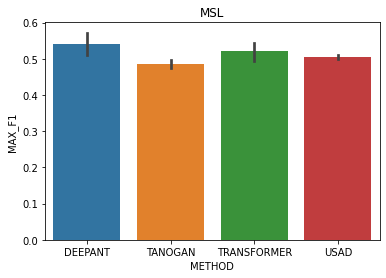

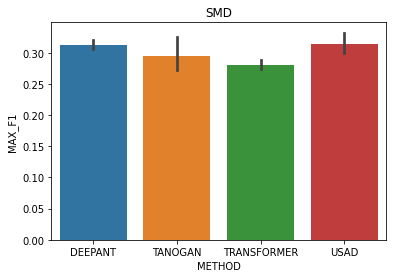

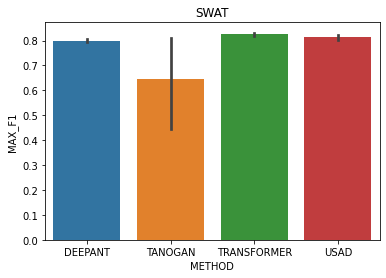

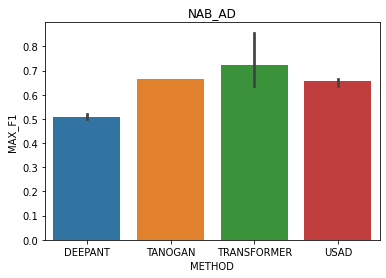

In [11]:
for d in max_f1.DATASET.unique():
  data = max_f1[max_f1['DATASET']== d]
  sns.barplot(data = data, x="METHOD",y="MAX_F1")
  plt.title(d)
  plt.show()
  print()

## OTHER

SWAT


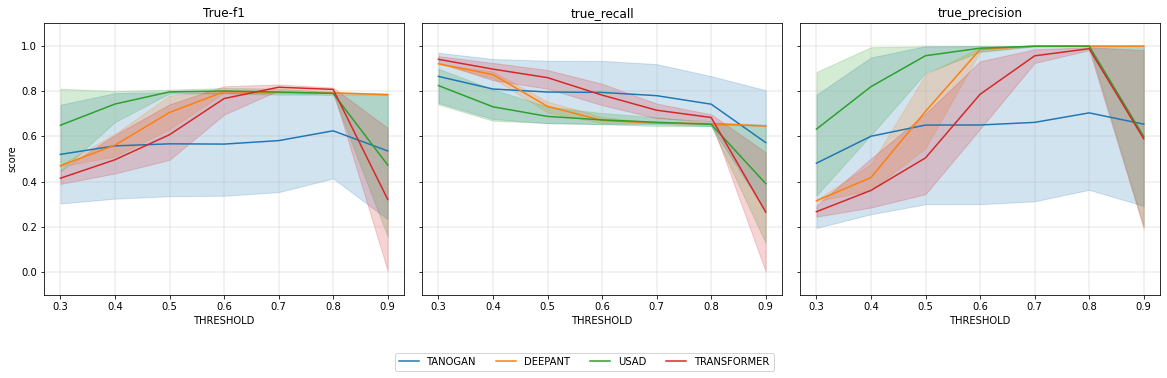


SMD


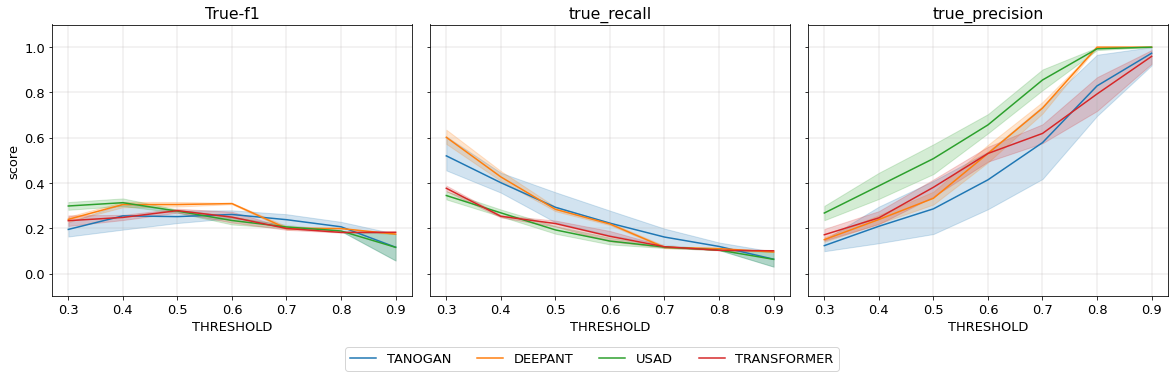


NAB_AD


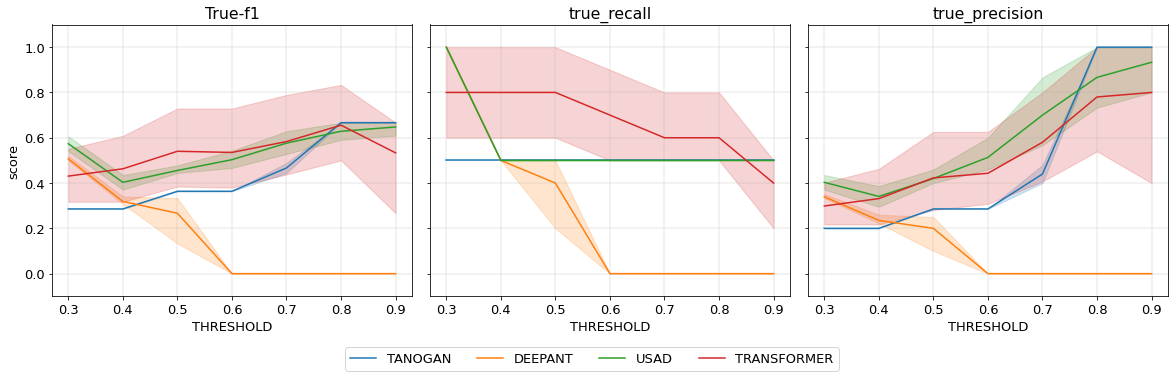


MSL


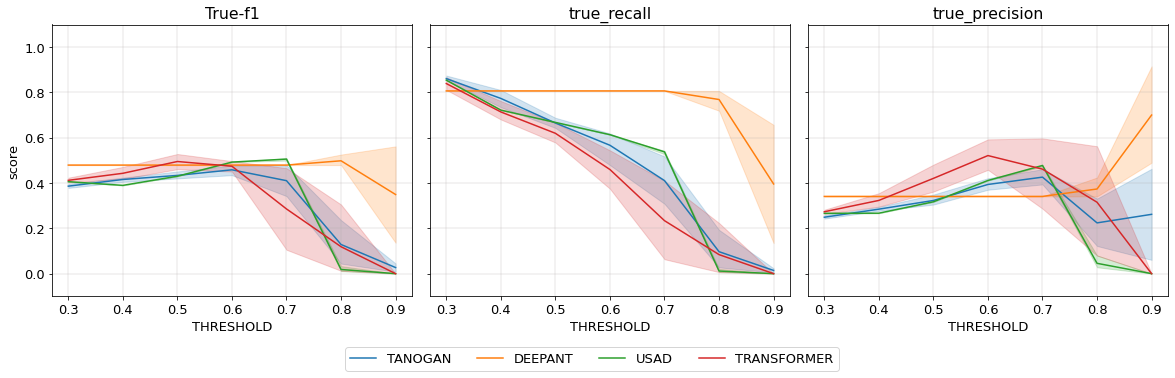

In [ ]:
font = {
    'size'   : 13
}

conf = {
    'SWAT': 30,
    'SMD': 30,
    'NAB_AD':100,
    'MSL': 30
 }
for d in conf:
  fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.05)
  # fig.suptitle("{}\n".format(d))
  print(d)
  for score,ax in zip(['True-f1','true_recall','true_precision'], axs):
    ax.set_ylim([-0.1, 1.1])
    for m in methods:
      data = excel[(excel['METHOD']== m) & (excel['SEQ_LEN']== conf[d]) & (excel['DATASET'] == d)]
      sns.lineplot(data=data, x='THRESHOLD', y=score, ax=ax, label=m)
    ax.set(ylabel='score')
    ax.title.set_text(score)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.3)
  fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.1))
  plt.rc('font', **font)
  plt.show()
  print()


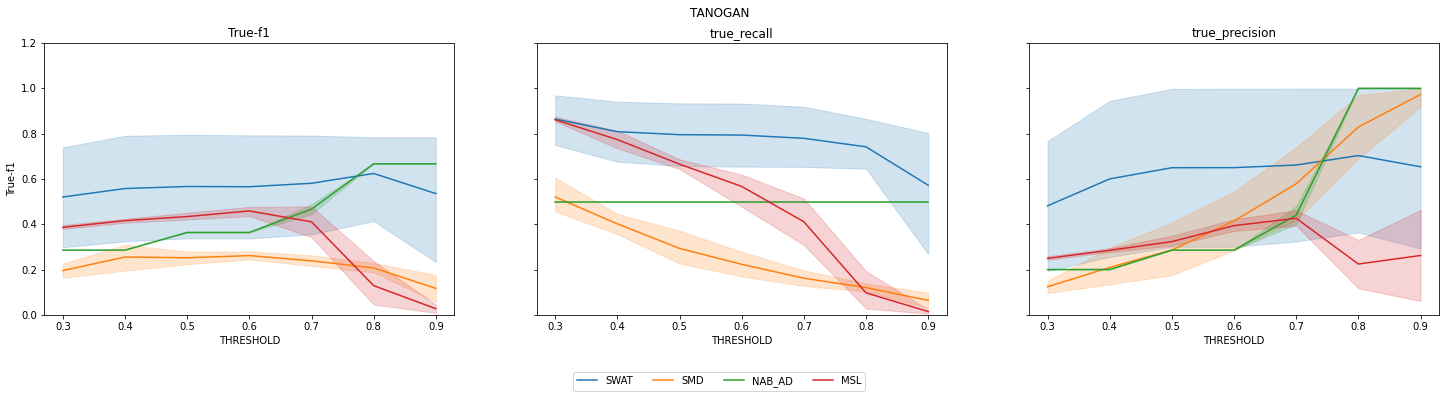

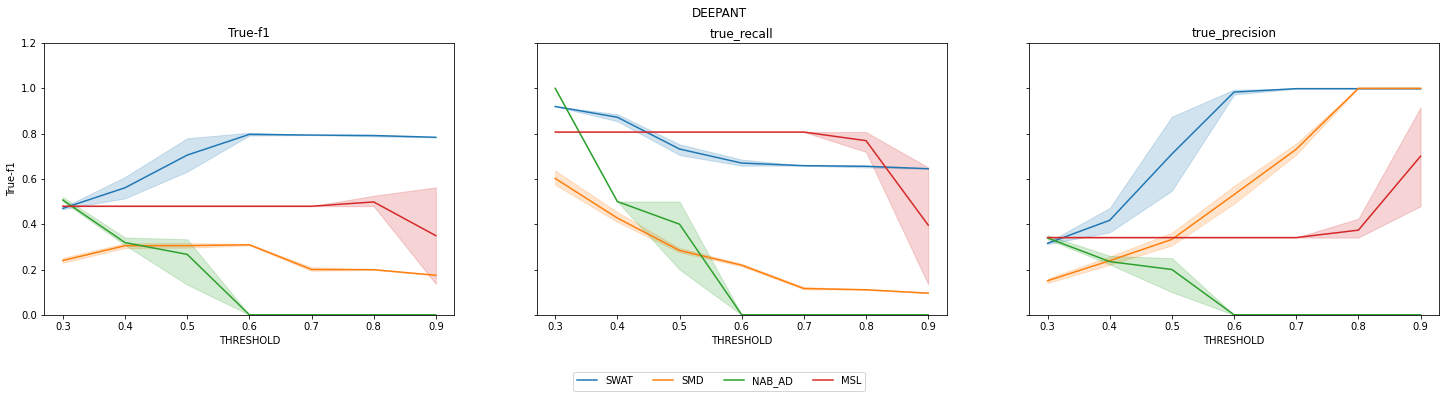

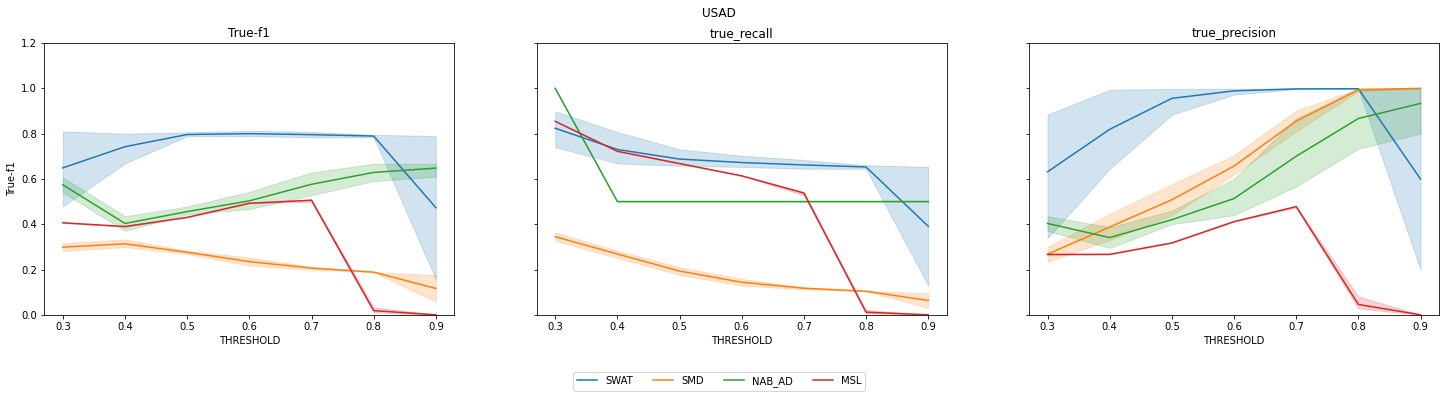

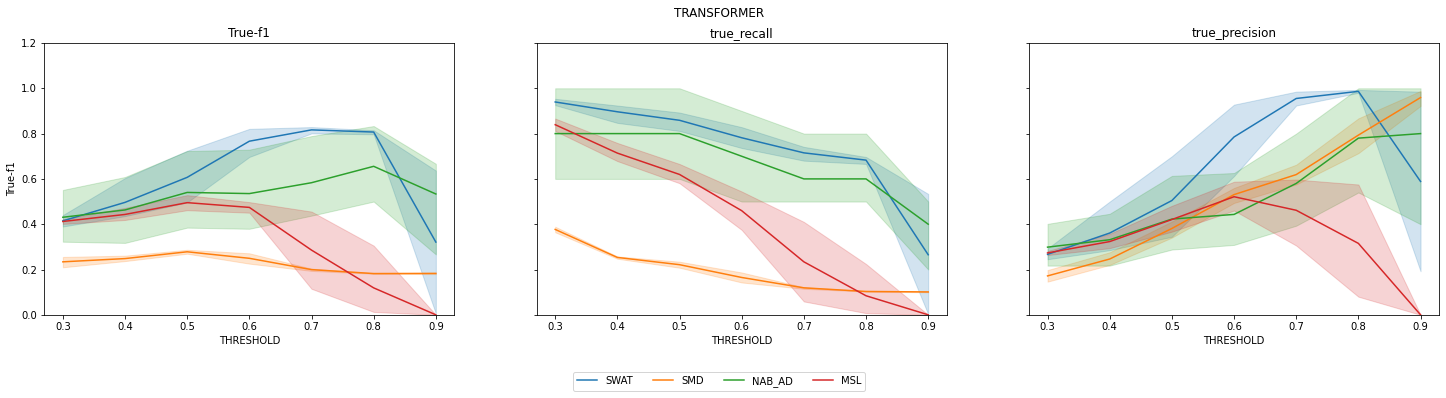

In [ ]:
for m in methods: 
  fig, axs = plt.subplots(1, 3, figsize=(25,5), sharey='row', subplot_kw=dict(frameon=True))
  # plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  for d in conf: 
    data = excel[(excel['METHOD']== m) & (excel['SEQ_LEN']== conf[d]) & (excel['DATASET'] == d)]
    for score, ax in zip(['True-f1','true_recall','true_precision'], axs):
      ax.set_ylim([0, 1.2])
      sns.lineplot(data=data, x='THRESHOLD', y=score, ax=ax, label=d)
      ax.title.set_text(score)
      handles, labels = ax.get_legend_handles_labels()
      ax.get_legend().remove()
  fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.1))
  plt.show()
  print()

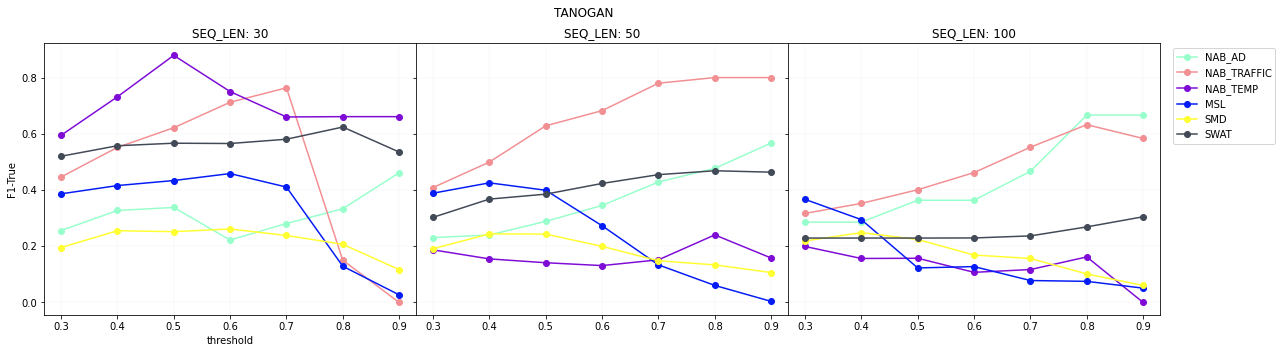

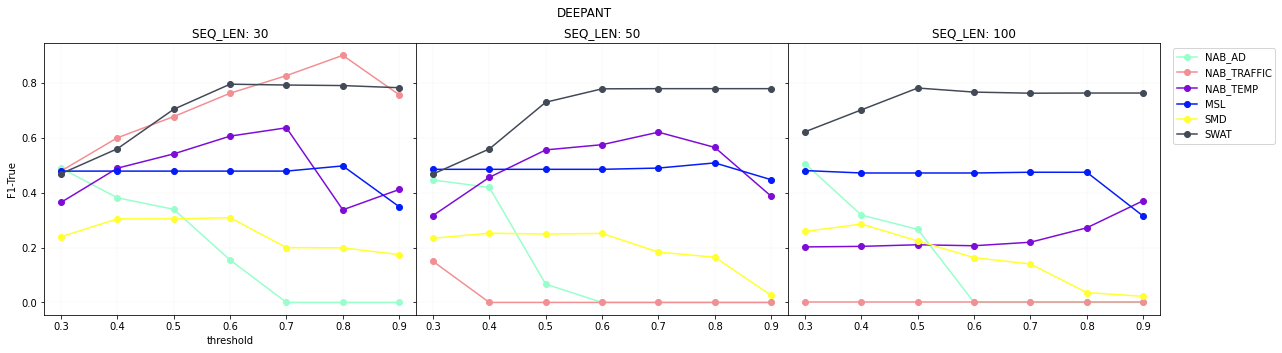

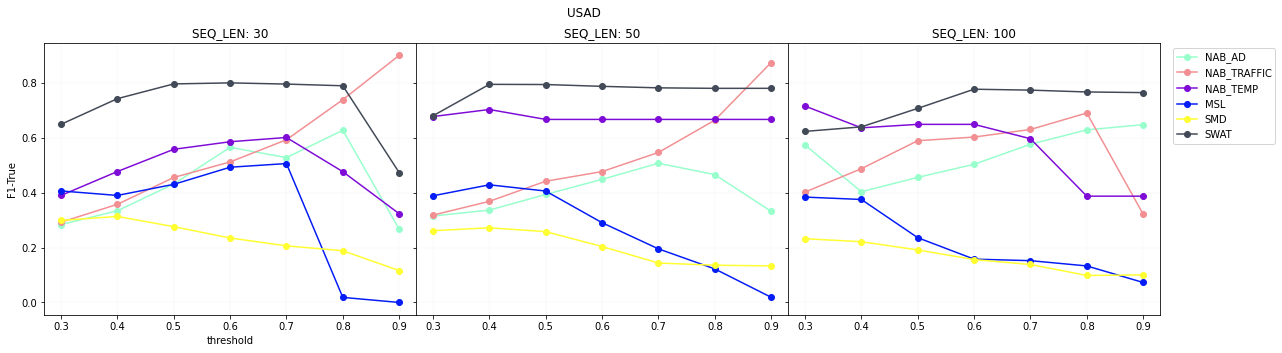

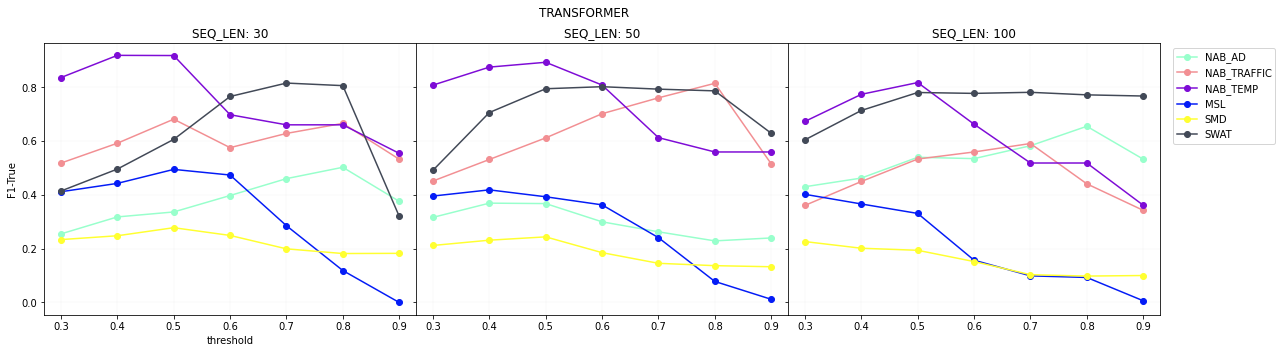

In [ ]:
for m in methods: 
  fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  
  for i,d in enumerate(datasets): 
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=d, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")

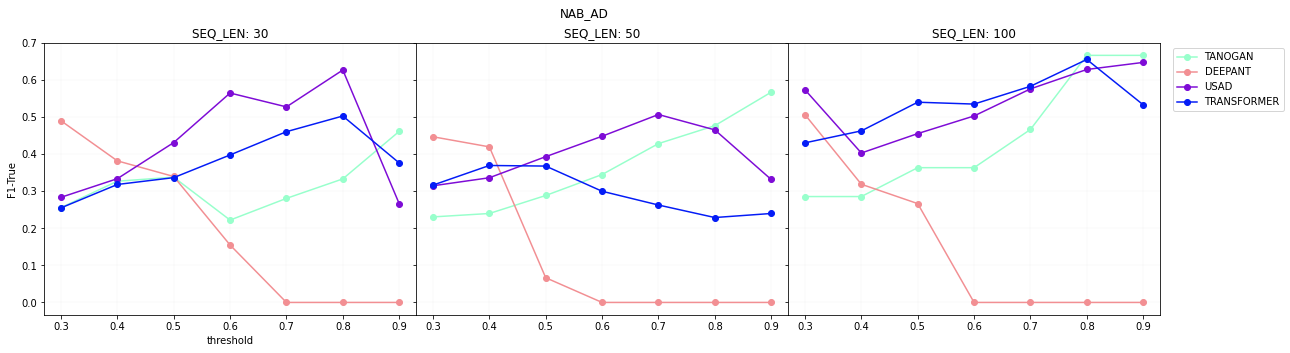

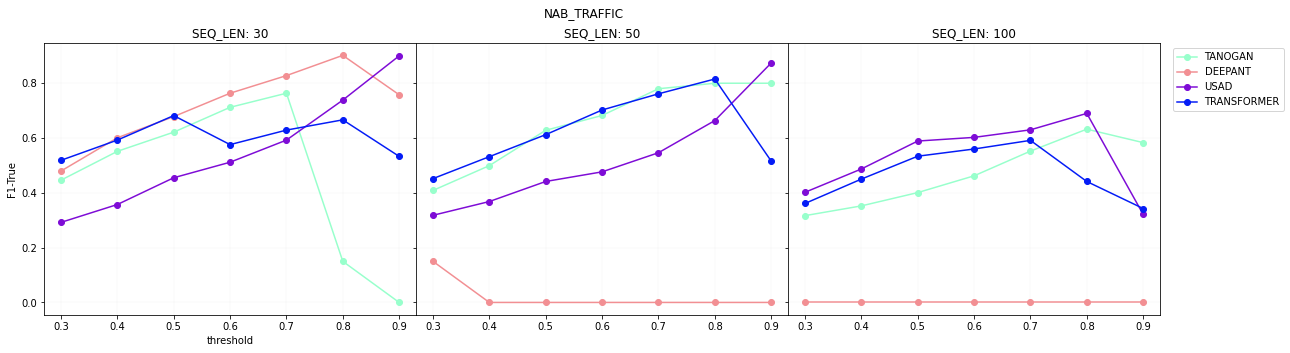

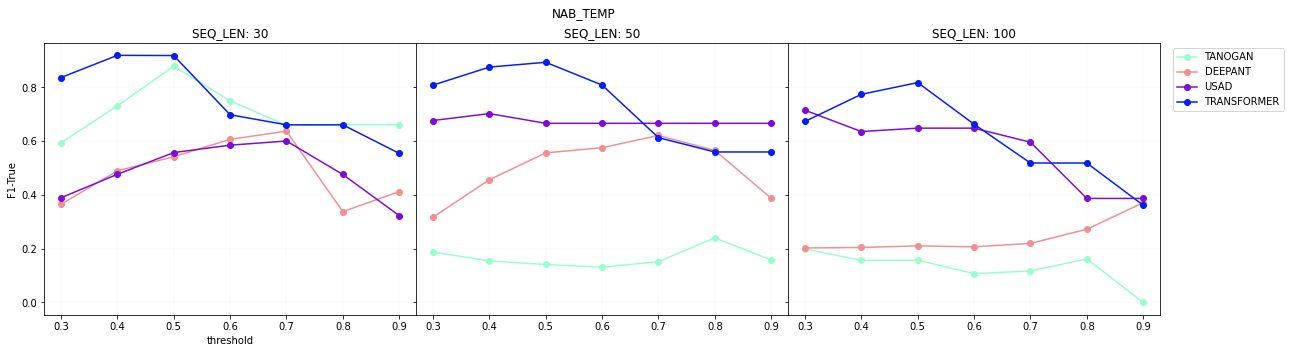

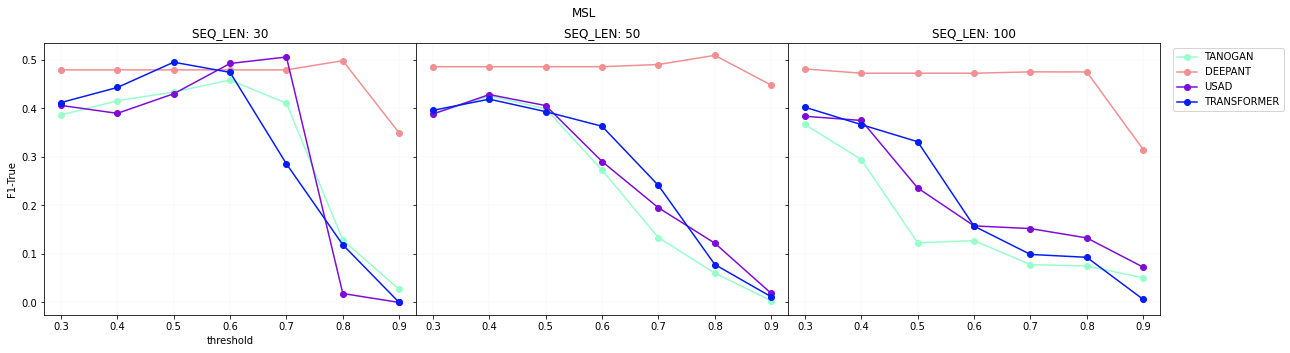

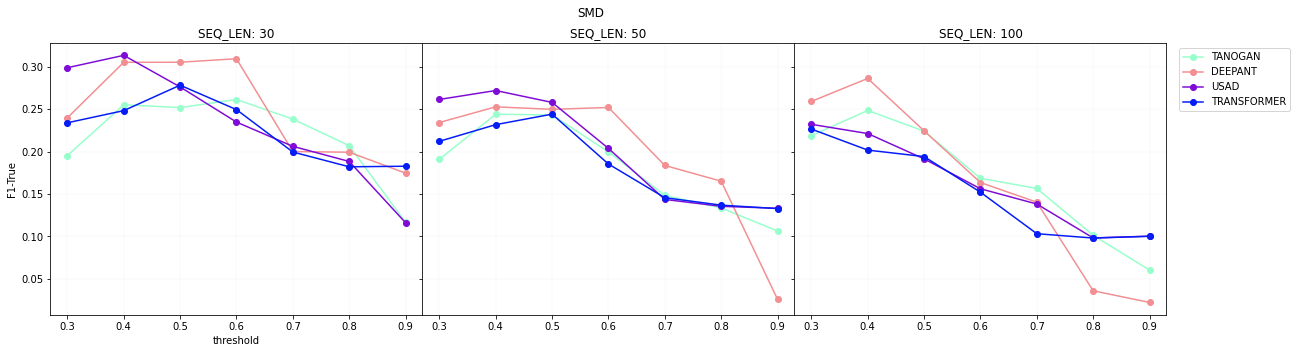

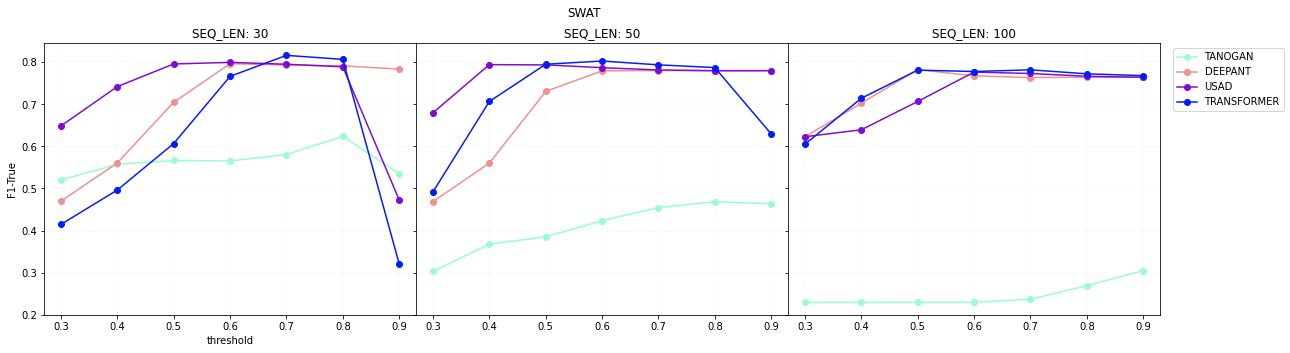

In [ ]:
for d in datasets:
  fig, axs = plt.subplots(1, len(lengths), figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(d)
  for i,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=m, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")


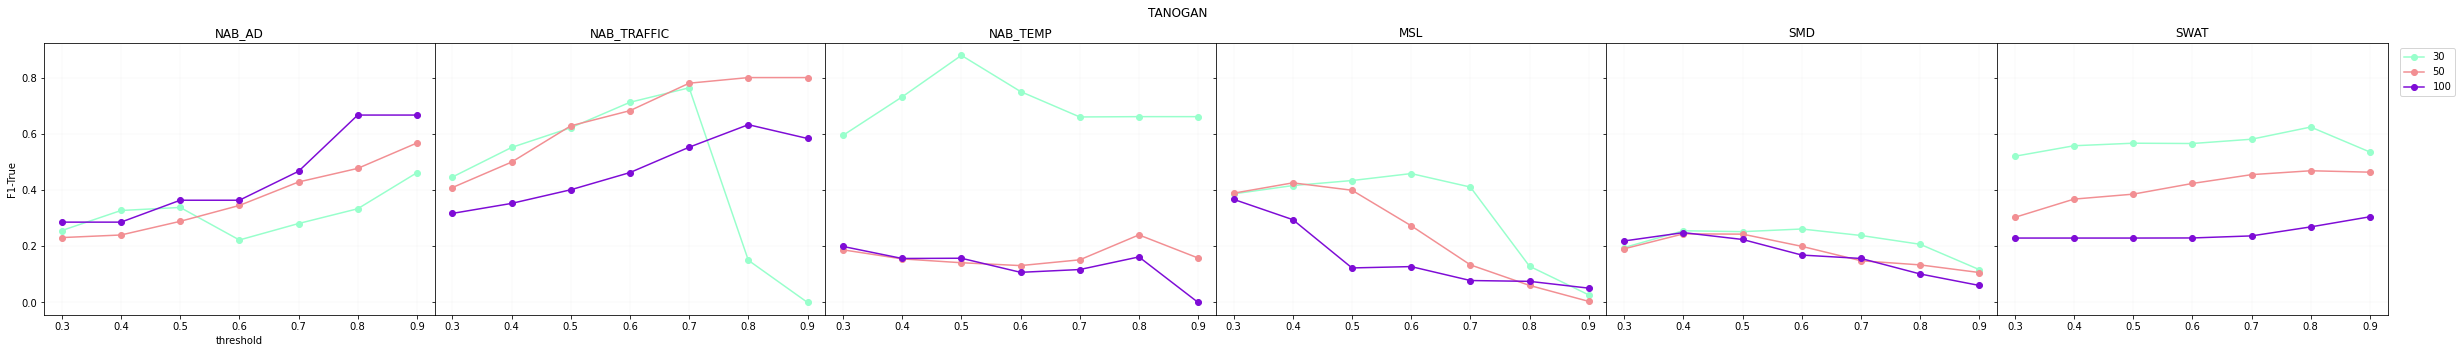

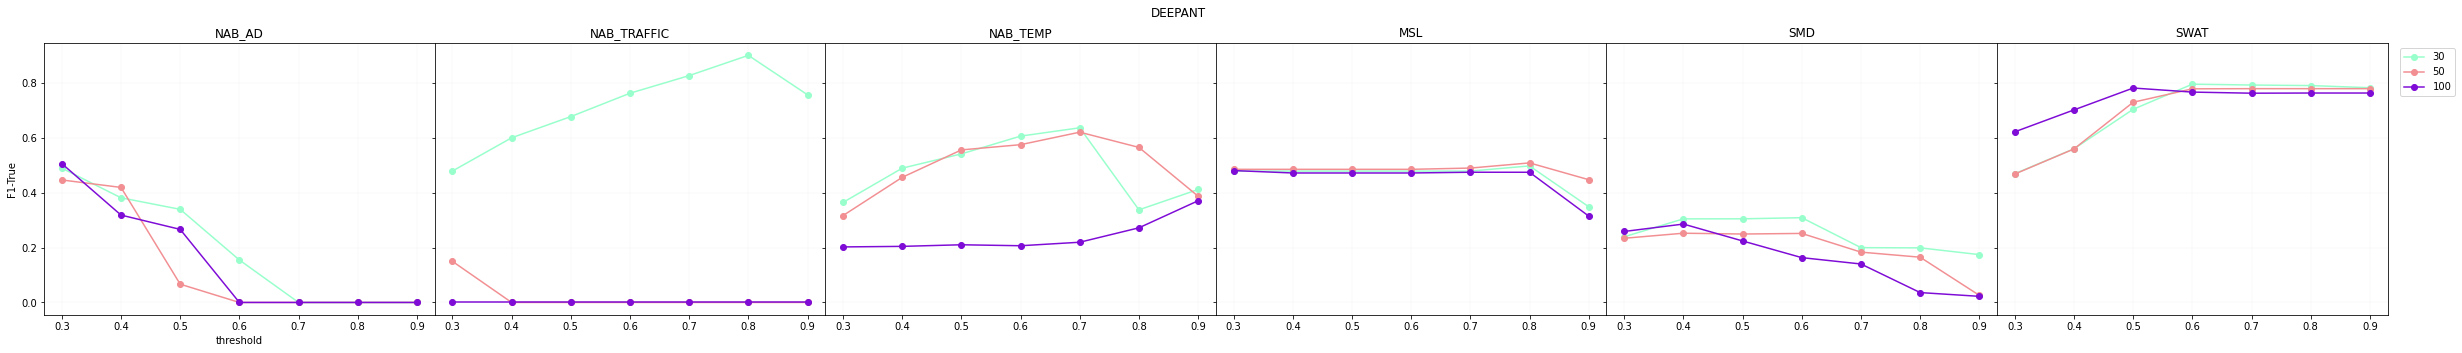

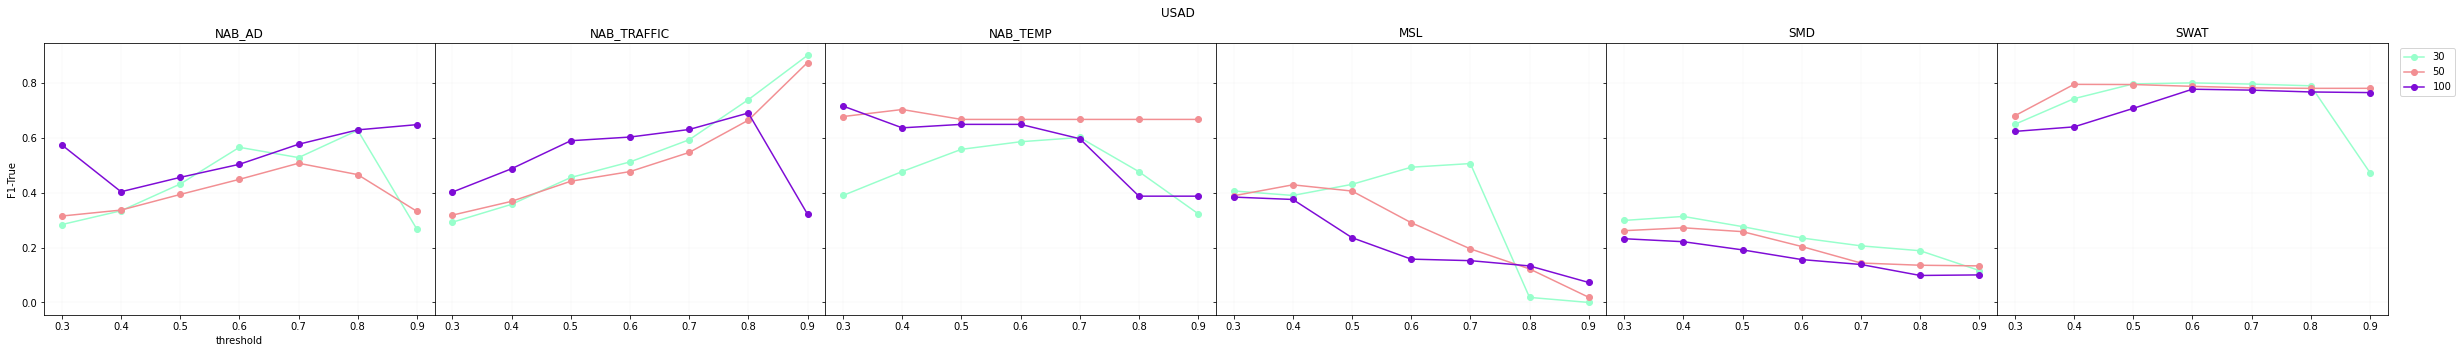

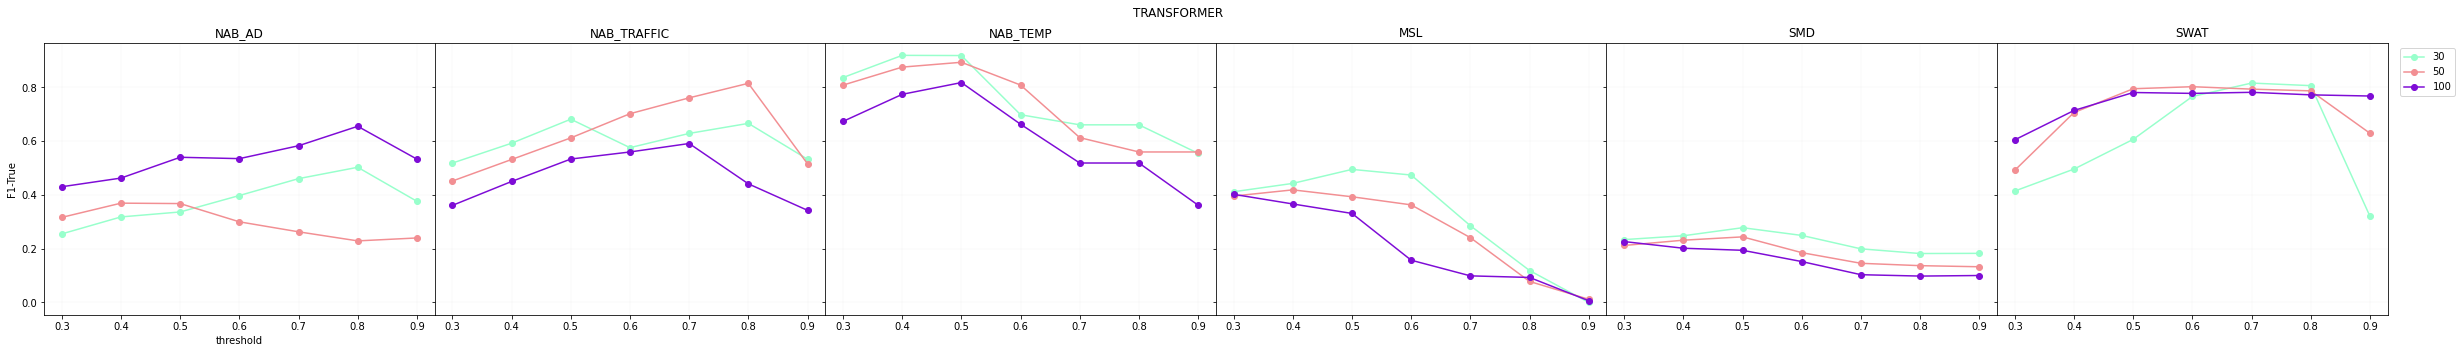

In [ ]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]



for m in methods:
  fig, axs = plt.subplots(1, len(datasets), figsize=(len(datasets)*7,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  for j,d in enumerate(datasets):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for i,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=l, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("{}".format(d))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")



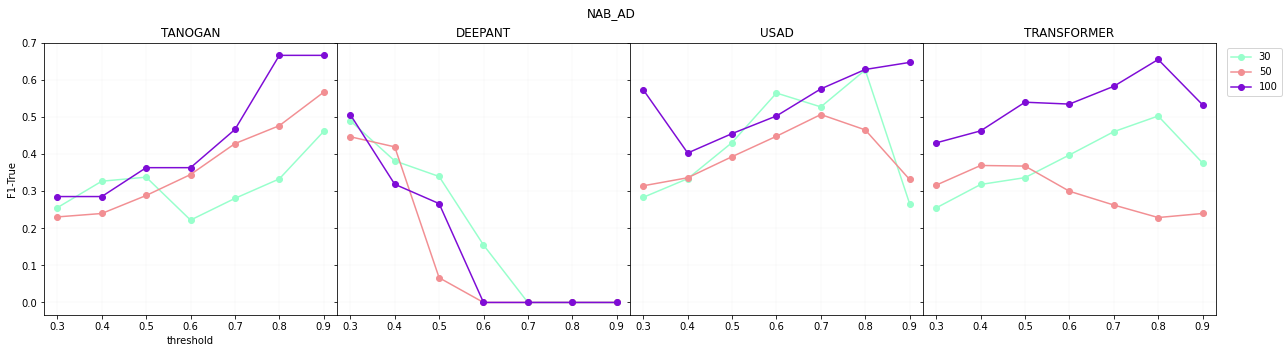

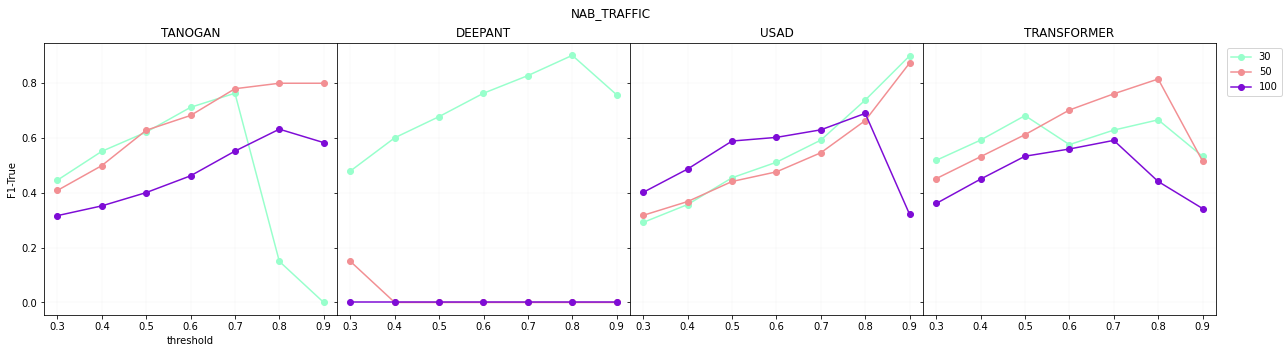

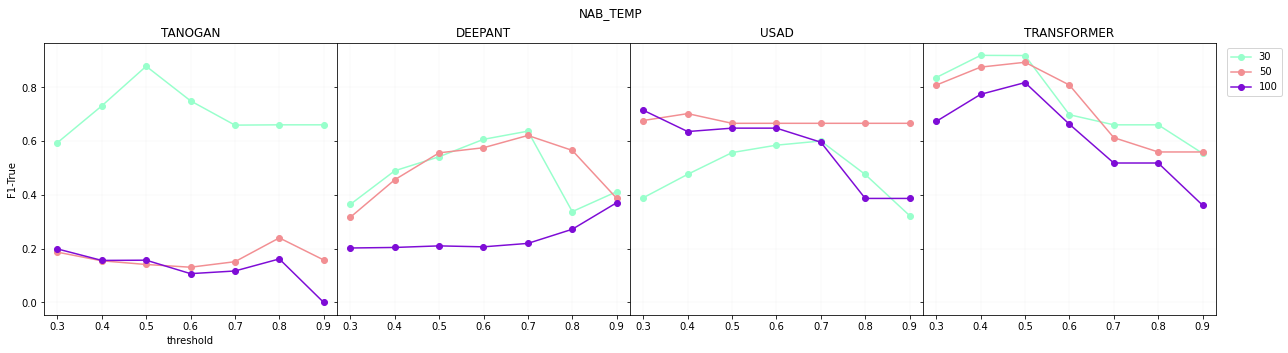

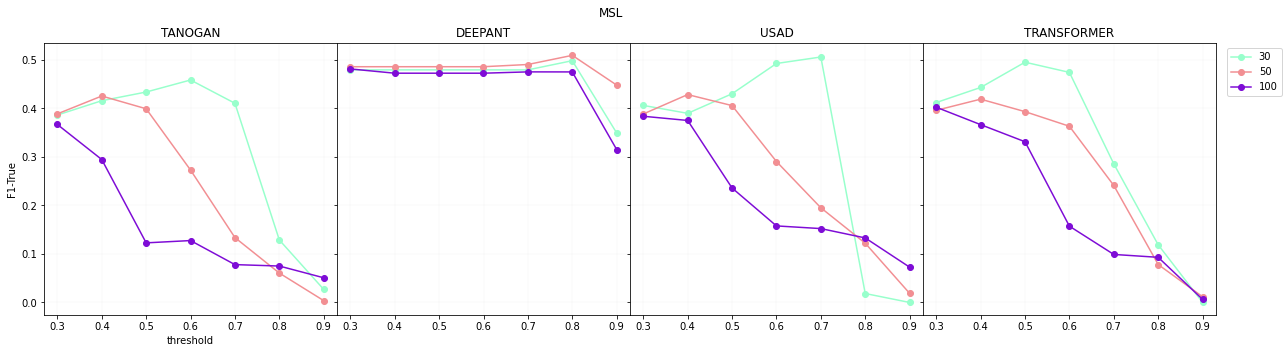

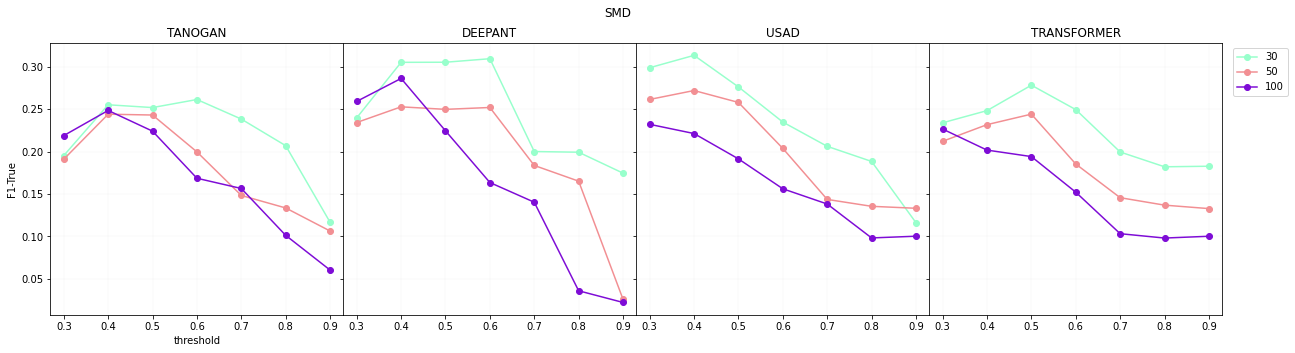

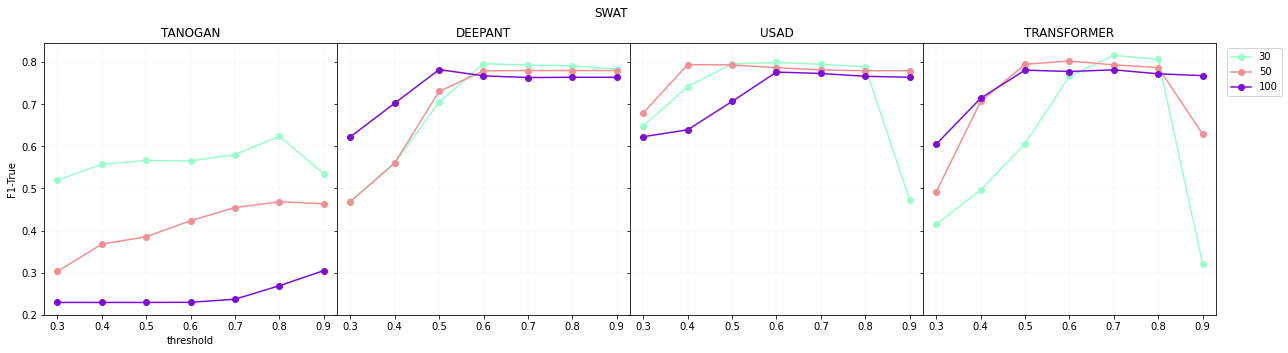

In [ ]:
for d in datasets:
  fig, axs = plt.subplots(1, len(methods), figsize=(len(datasets)*3.5,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(d)
  for j,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for i,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=l, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("{}".format(m))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")


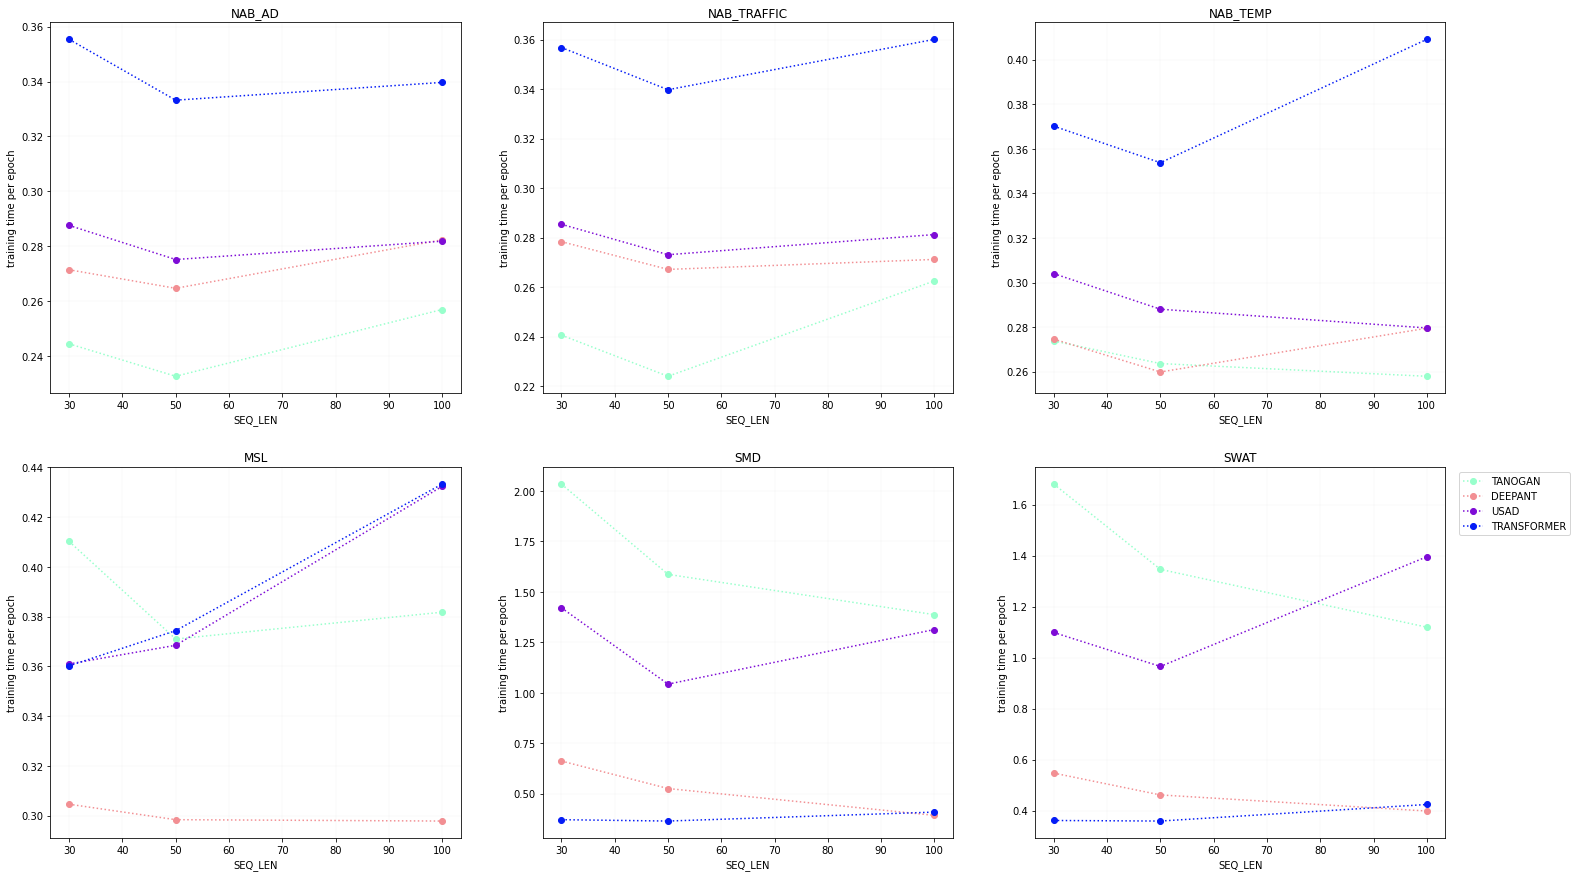

In [ ]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

fig, axs = plt.subplots(2, 3, figsize=(25,15))
for i,d in enumerate(datasets):
  for j,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN']).mean().reset_index()
    axs.flat[i].plot(means['SEQ_LEN'],
              means['epoch_time'],
              label=m, 
              color=colors[j], 
              linestyle=styles[2],
              marker='o')
    axs.flat[i].grid(color='lightgrey', linestyle='-', linewidth=0.1)
    axs.flat[i].set_title("{}".format(d))
    axs.flat[i].set(xlabel="SEQ_LEN",ylabel="training time per epoch")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()
